In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

%matplotlib inline

### Implement K-Means

In [25]:
class KMean:
    def __init__(self, n_cluster):
        """
        X: input with shape NxM
        n_cluster: number of cluster
        """
        
        self.n_cluster = n_cluster
        
    def fit(self, X):
        self.X = X
        
        # random center points         
        random_centers = self.X[np.random.choice(self.X.shape[0], self.n_cluster)]
        self.centers = [random_centers]
        
        # loop
        while True:  
            # calc dist between all points and all centers
            dist_matrix = cdist(self.X, self.centers[-1], 'euclidean')
            
            # calc cluster's index for each point
            self.labels = np.argmin(dist_matrix, axis=1)
            
            # calc new centers for each cluster
            new_centers = np.zeros((self.n_cluster, self.X.shape[1]))
            for k in range(self.n_cluster):
                k_th_points = self.X[self.labels == k, :]
                k_th_center = np.mean(k_th_points, axis=0)
                new_centers[k, :] = k_th_center
            
            # compare with previous center, if coveraged then break 
            if (np.sort(new_centers) == np.sort(self.centers[-1])).all():
                break
            
            self.centers.append(new_centers)
            
    def plot_result(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.labels, alpha=0.8)
        for k in range(self.n_cluster):
            k_th_center = self.centers[-1][k]
            plt.scatter(k_th_center[0], k_th_center[1], s=500, marker='*',color=np.random.rand(3,), label=f'{k}')

        plt.title(f"K-mean with {self.n_cluster} cluster")
        plt.legend()
        plt.show()

### Apply K-Means with Iris dataset

In [26]:
from sklearn import datasets

In [27]:
iris = datasets.load_iris().data
iris_x = iris[:, :2]

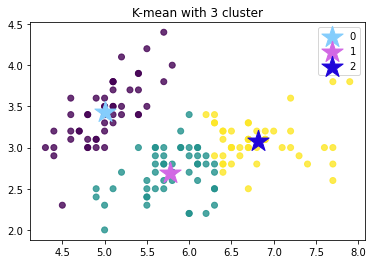

In [28]:
kmean = KMean(n_cluster=3)
kmean.fit(iris_x)
kmean.plot_result()